# 1. Evaluation Project  - (Loan Application Status Prediction) 

# <span style="color:red">By :- Punit Vishal Singh</span>

### <span style="color:green">Import Packages</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### <span style="color:green">Loading The Dataset...............</span>

In [2]:
df=pd.read_csv("loan_prediction.csv")

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### <span style="color:green">To check the number of columns of object datatype</span>

In [5]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 8


In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### <span style="color:green">Checking Column Names</span>

In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### <span style="color:blue">To Drop Load ID Column</span>

- Because Loan_ID column is completely unique in nature and it's not correlated with any of the other column.

In [9]:
df = df.drop(columns=['Loan_ID'])

## <span style="color:red">Level Encoding</span>

### <span style="color:green">To Encode Categorical Values of Gender Column</span>

In [10]:
df= df.replace({"Gender":{"Male":1, "Female":0 }})

### <span style="color:green">To Encode Categorical Values of Married Column</span>

In [11]:
df =df.replace({"Married" :{"Yes":1, "No":0}})

### <span style="color:green">To Encode Categorical Values of Dependents Column</span>

In [12]:
df['Dependents'] = df['Dependents'].replace('3+', '3')
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

### <span style="color:green">To Encode Categorical Values of Education Column</span>

In [13]:
df['Education'].value_counts()
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

### <span style="color:green">To Encode Categorical Values of Self_Employed Column</span>

In [14]:
df['Self_Employed'].value_counts()
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

### <span style="color:green">To Encode Categorical Values of Property_Area Column</span>

In [15]:
df['Property_Area'].value_counts()
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

### <span style="color:green">To Encode Categorical Values of Loan_Status Column</span>

In [16]:
df['Loan_Status'] = df.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

In [17]:
print(df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0          1            0.0             5849   
1       1.0      1.0         1.0          1            0.0             4583   
2       1.0      1.0         0.0          1            1.0             3000   
3       1.0      1.0         0.0          0            0.0             2583   
4       1.0      0.0         0.0          1            0.0             6000   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0          1            0.0             2900   
610     1.0      1.0         3.0          1            0.0             4106   
611     1.0      1.0         1.0          1            0.0             8072   
612     1.0      1.0         2.0          1            0.0             7583   
613     0.0      0.0         0.0          1            1.0             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

### <span style="color:green">Checking Null/Missing Values</span>

In [18]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### <span style="color:blue">How To Treat The Null Values?</span>

- We will fill all the NaN Values with the Median of each column. 
- We can drop all the Nan values from the dataset by using #df=df.dropna() or we can replace it with mean or median 
- We are not replacing NaN with Mean because most of the columns are categorical in nature in the range of (0,1) which will not work.
- We are going to replace the Nan values with Median.

### <span style="color:blue">We are Replacing NaN Values with Median</span>

In [19]:
df.fillna(df.median(), inplace=True)


### <span style="color:blue">Again Checking The NaN Values?</span>

In [20]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# <span style="color:red">Exploratory Data Analysis (EDA)</span>

### <span style="color:green">Countplot</span>

<AxesSubplot:xlabel='Gender', ylabel='count'>

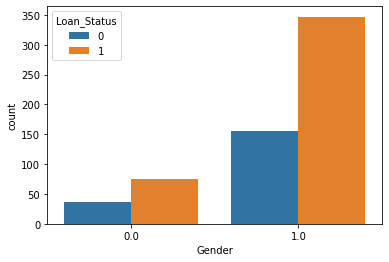

In [21]:
sns.countplot(x='Gender',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- Here -> "Male":1, "Female":0
- We can see that the loan sanction to males are comparatively higher than female. 

<AxesSubplot:xlabel='Married', ylabel='count'>

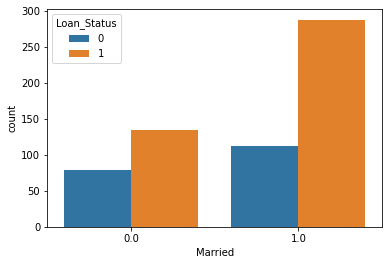

In [22]:
sns.countplot(x='Married',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- Here -> "Yes":1, "No":0
- We can see that the loan sanction to Married People are comparatively higher than Unmarried. 

<AxesSubplot:xlabel='Dependents', ylabel='count'>

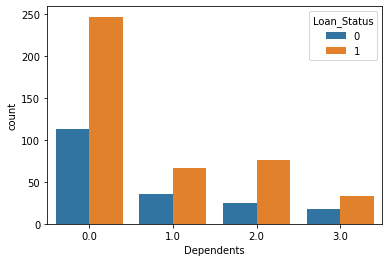

In [23]:
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- We can see that the loan status is high when the there are less number of dependent people because it increases the chances of loan repayment.

<AxesSubplot:xlabel='Education', ylabel='count'>

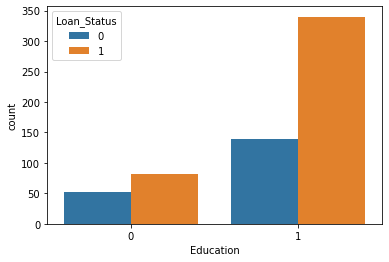

In [24]:
sns.countplot(x='Education',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- Here -> "Graduate":1, "Not Graduate":0
- We can see that the loan sanction to Graduate People are comparatively higher than Not Graduate.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

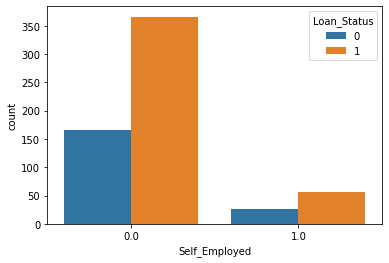

In [25]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- Here -> "Yes":1, "No":0
- We can see that the loan sanction to Other of Employed People are comparatively higher than Sel Employed People.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

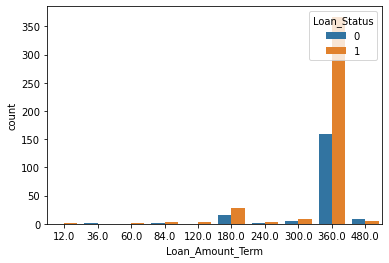

In [26]:
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>

- We can see that there is high chance of getting loan sanction when the applicant is applying for the loan for longer period.

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

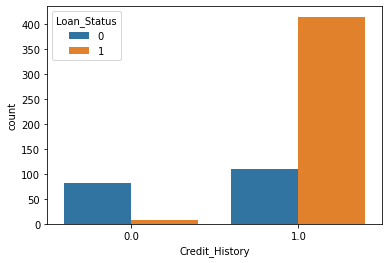

In [27]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- Here -> "Yes":1, "No":0
- We can see that the loan sanction to those People who are having credit history is comparatively higher than those who don't have.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

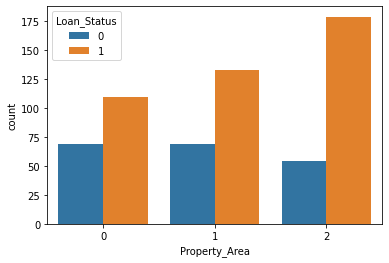

In [28]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>
- Here -> 'Rural': 0, 'Urban': 1, 'Semiurban': 2
- We can see that the loan sanction to those People who live in Semiurban are comparatively higher than other areas.

### <span style="color:green">Scatterplot</span>

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

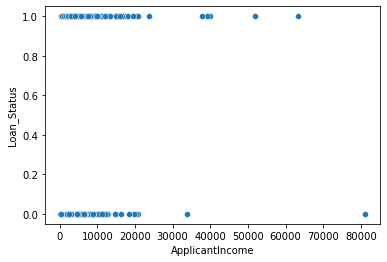

In [29]:
sns.scatterplot(x='ApplicantIncome',y='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>

- It is showing that ApplicantIncome is equally distributed b/w 0 to 20000

#### <span style="color:blue">Conclusion:-</span>
- So, If the ApplicantIncome is greater then 20000 then there is high chances that the loan will be approve.But we need more evidences to support the hypothesis.


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

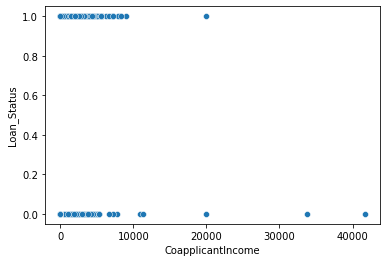

In [30]:
sns.scatterplot(x='CoapplicantIncome',y='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>

- It is showing that CoapplicantIncome is equally distributed b/w 0 to 16000

#### <span style="color:blue">Conclusion:-</span>
- So, If the CoapplicantIncome is greater then 16000 then there is high chances that the loan will be approve.But we need more evidences to support the hypothesis.

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

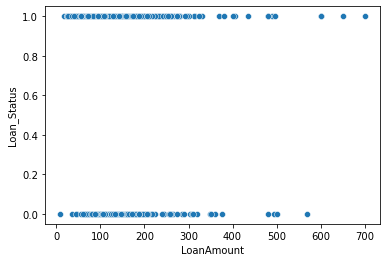

In [31]:
sns.scatterplot(x='LoanAmount',y='Loan_Status',data=df)

#### <span style="color:blue">Observation:-</span>

- It is showing that LoanAmount is equally distributed b/w 10 to 330

#### <span style="color:blue">Conclusion:-</span>
- So, If the LoanAmount is greater then 330 then there is high chances that the loan will be approve.But we need more evidences to support the hypothesis.

## <span style="color:green">Showing Entire Data as Pairplot & Saving as Pairplot.png</span>

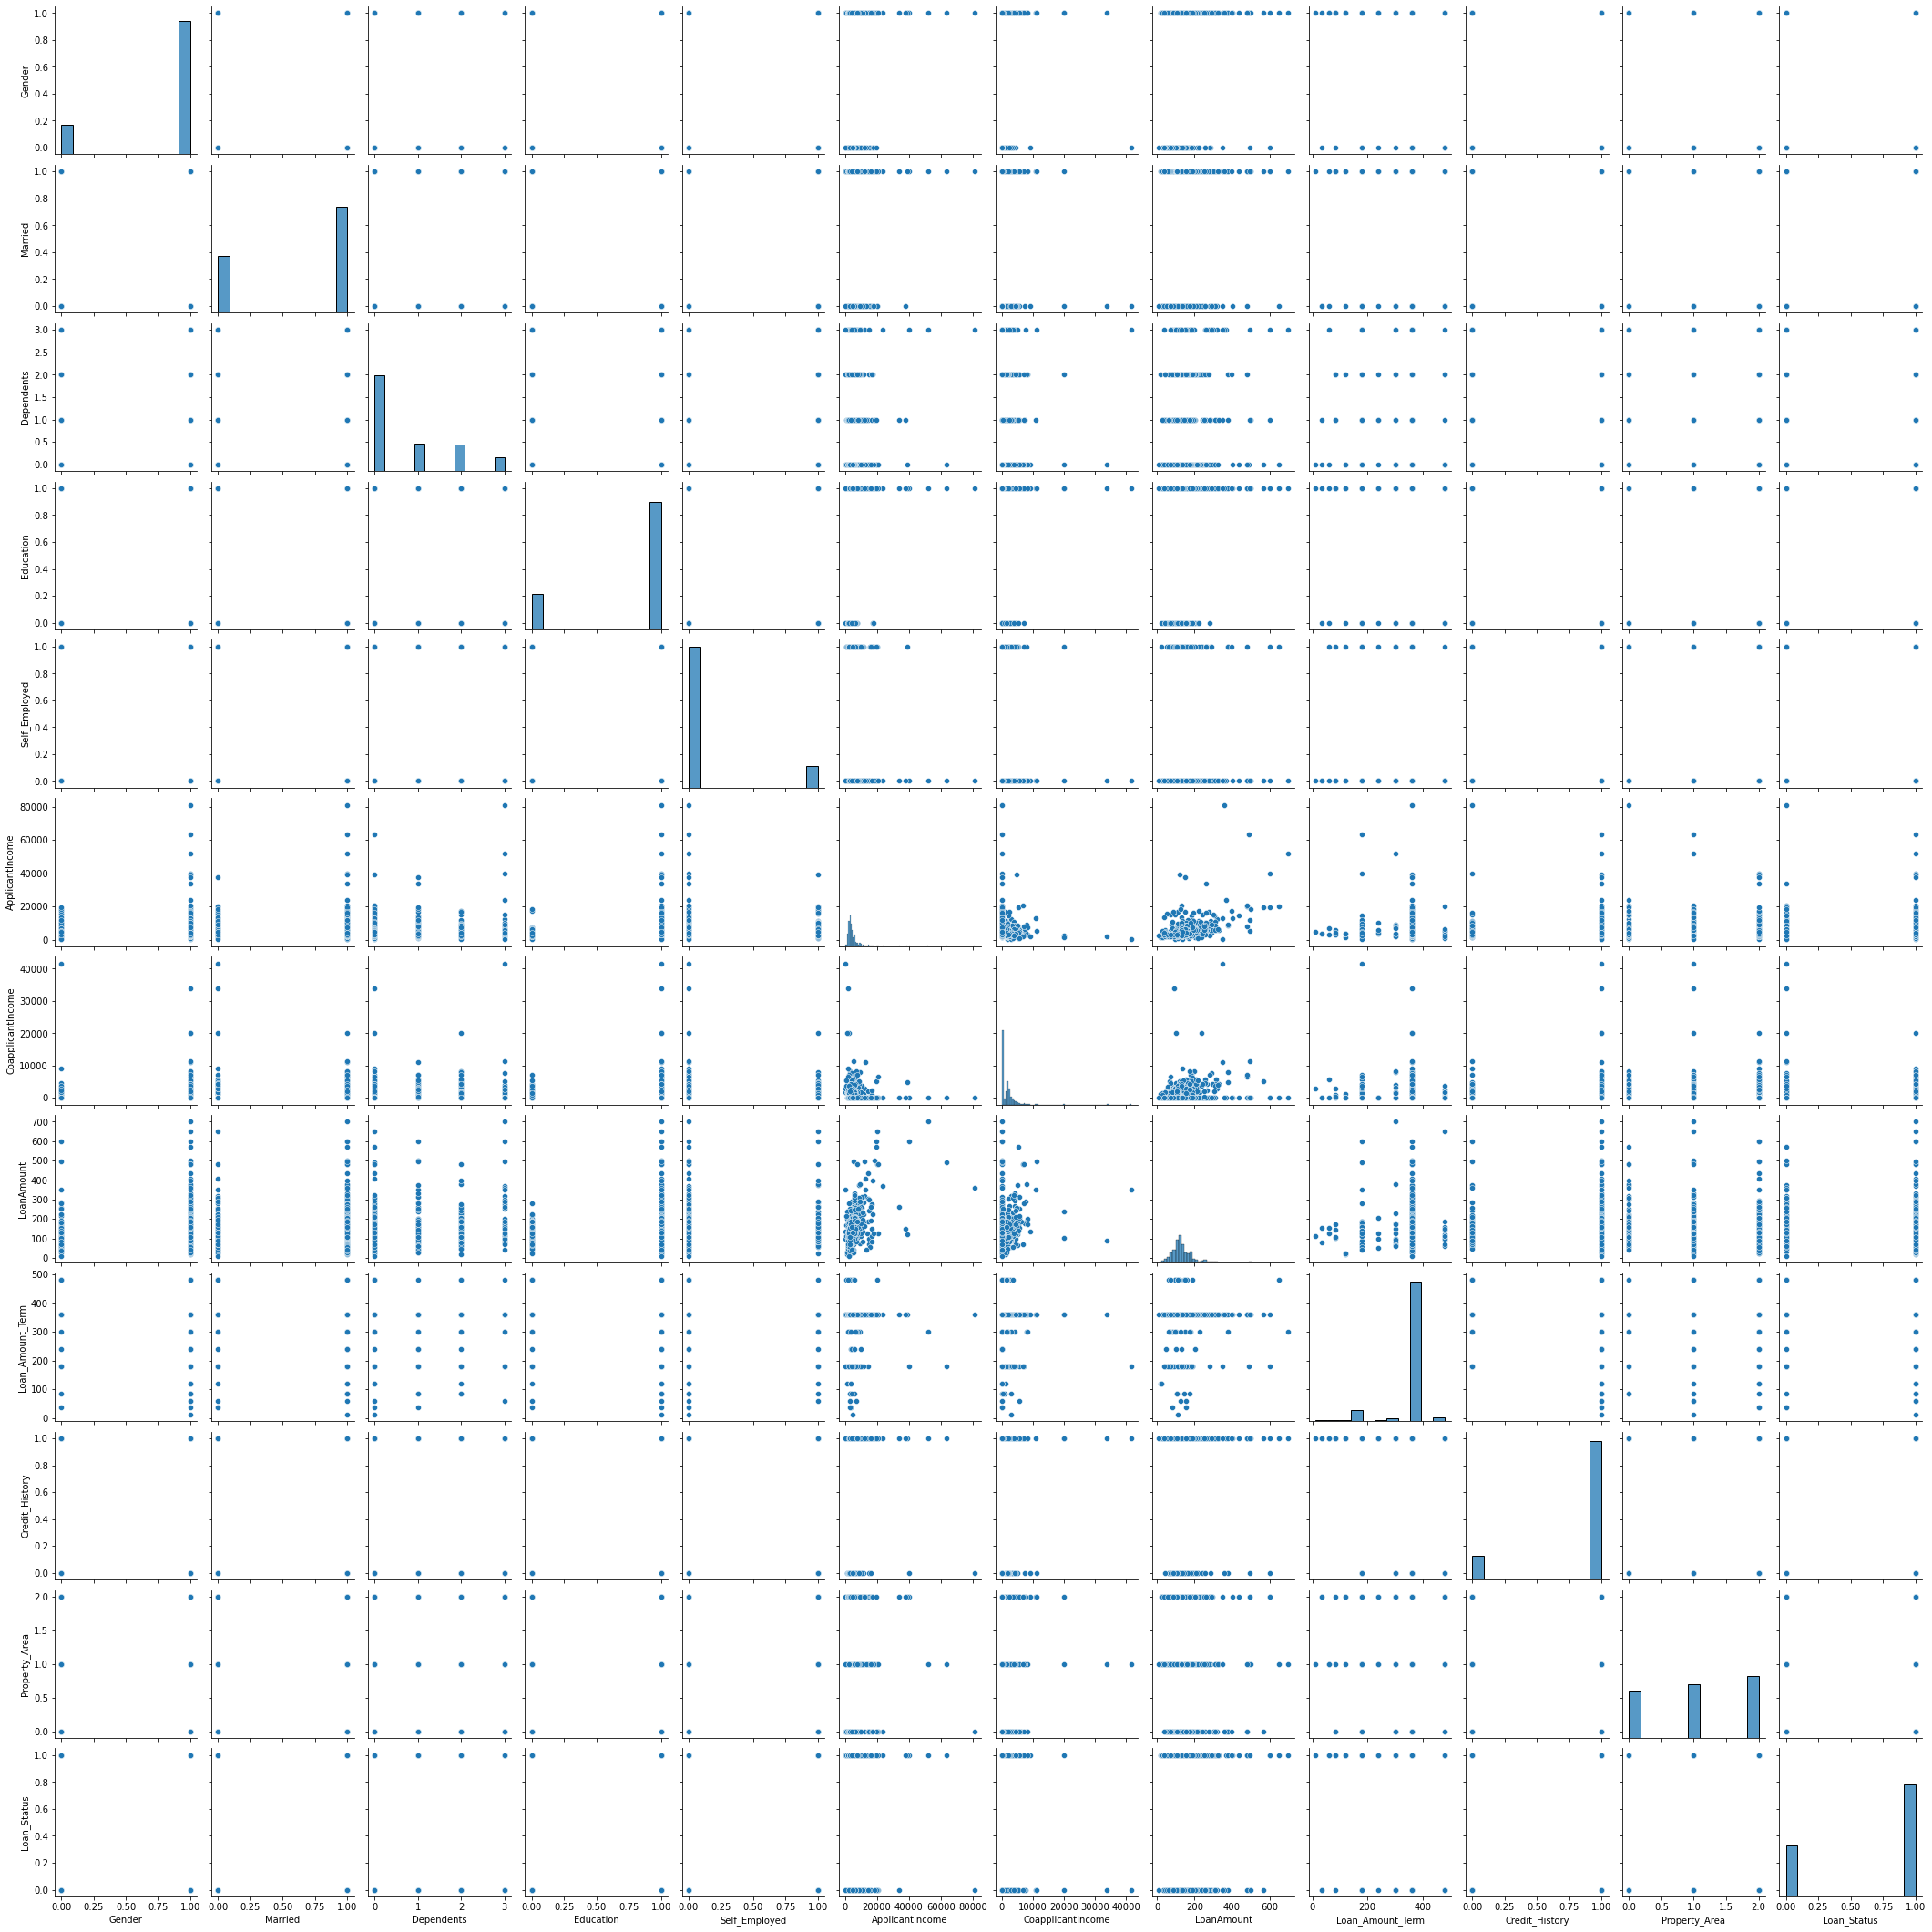

In [32]:
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.savefig('pairplot.png')
plt.show()

## <span style="color:green">Correlation</span>

In [33]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.109521,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.007281,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,0.001601,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.168759,0.073928,0.073658,0.066740,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.007124,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.017321,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,-0.019087,-0.059187
LoanAmount,0.106904,0.146546,0.163103,0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.027714,-0.033214
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,0.016086,-0.022549
Credit_History,0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.033102,0.540556


#### <span style="color:blue">Conclusion:-</span>

- There is nearly 1% correlation between Gender Column & Loan_Status 
- There is nearly 9% correlation between Married Column & Loan_Status 
- There is nearly 1% correlation between Dependents Column & Loan_Status 
- There is nearly 8% correlation between Education Column & Loan_Status 
- There is less than 1% correlation between Self_Employed Column & Loan_Status
- There is less than 1% correlation between ApplicantIncome Column & Loan_Status
- There is nearly 5% correlation between CoapplicantIncome Column & Loan_Status
- There is nearly 3% correlation between LoanAmount Column & Loan_Status
- There is nearly 2% correlation between Loan_Amount_Term Column & Loan_Status
- There is nearly 5% correlation between Credit_History Column & Loan_Status
- There is nearly 14% correlation between Property_Area Column & Loan_Status--> Maximum Correlation


- As we know that most of the variables in the available dataset have an almost null correlation with the Loan_Status which is the independent variable due to which they don’t have a great influence on the final result, so they are not relevant data for the prediction.

- So we’ll consider only those variables whose absolute value of the correlation be greater than a certain level and here are considering 0.05 which 5% as level for obtaining minimum 3 variables for the model.

In [34]:
# To Show correlation in ascending order

df.corr()['Loan_Status'].sort_values()

CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Education            0.085884
Married              0.091478
Property_Area        0.137545
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

#### <span style="color:blue">When we have large number of columns then to understand the level of correlation, we can use heatmap presentation to check the level of correlation</span>

<AxesSubplot:>

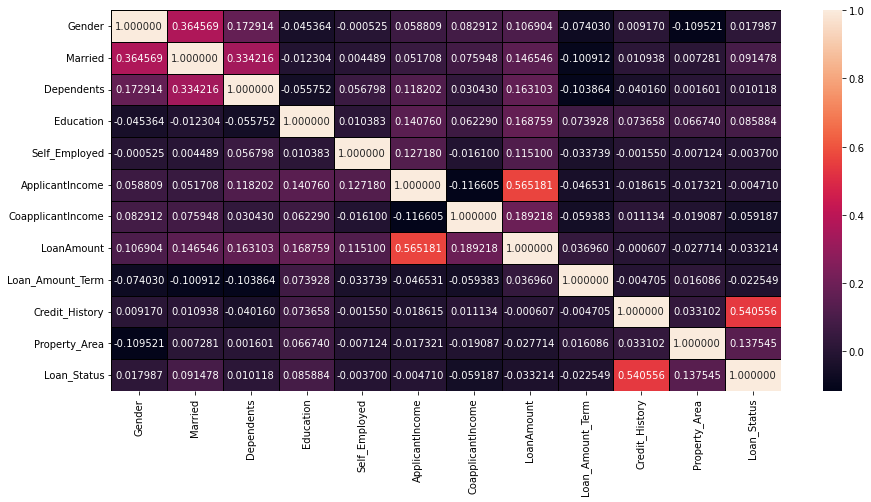

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt='2f')

### <span style="color:green">Describing Dataset</span>

In [36]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


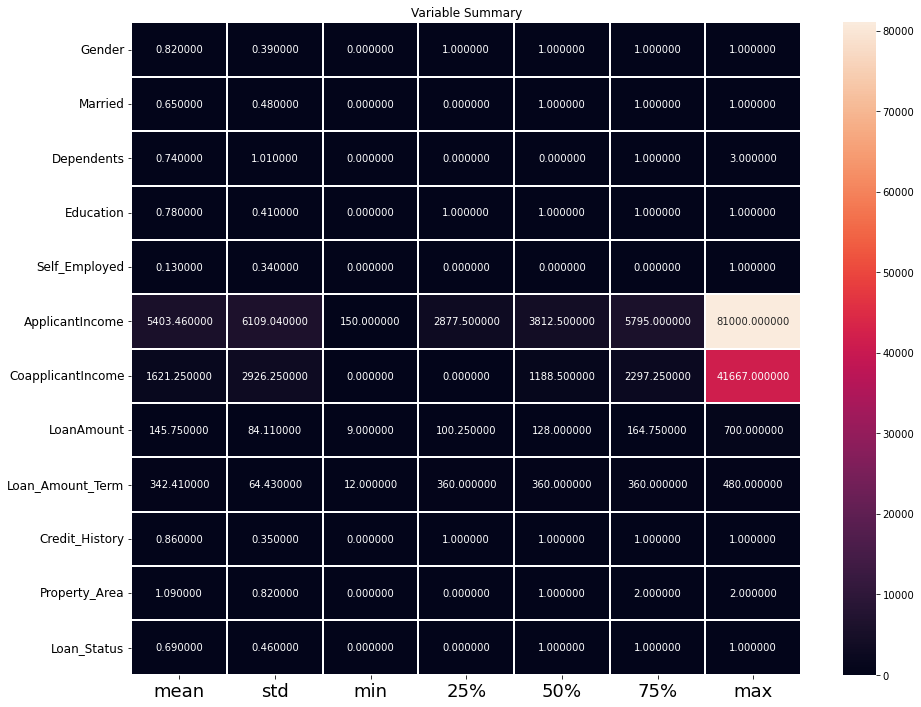

In [37]:
plt.figure(figsize=(15,12))
sns.heatmap (round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')

plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.savefig('heatmap.png')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 55.3 KB


### <span style="color:green">Outliers Checking</span>

In [39]:
import warnings
warnings.filterwarnings('ignore')

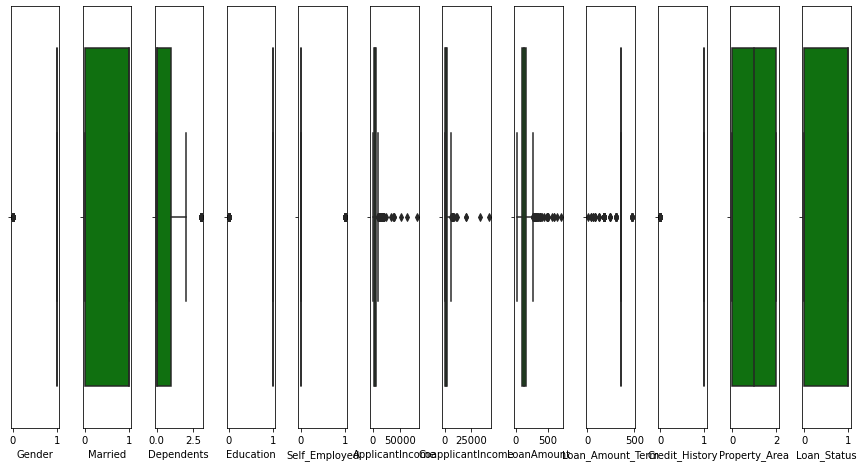

In [40]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))

for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

### <span style="color:green">Skewness</span>

In [41]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.162812
Loan_Status         -0.809998
dtype: float64

### <span style="color:green">Normal Distribution Curve</span>

<AxesSubplot:xlabel='Gender', ylabel='Density'>

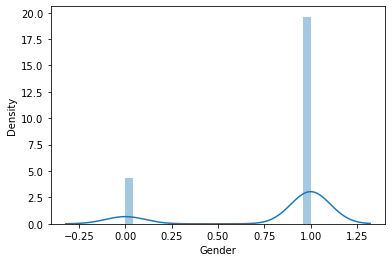

In [42]:
sns.distplot(df['Gender'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Married', ylabel='Density'>

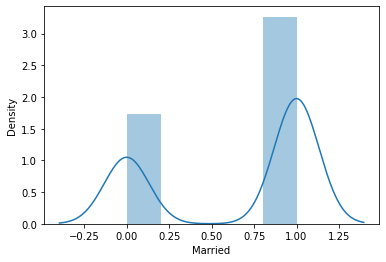

In [43]:
sns.distplot(df['Married'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

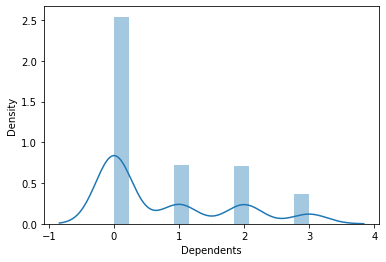

In [44]:
sns.distplot(df['Dependents'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Education', ylabel='Density'>

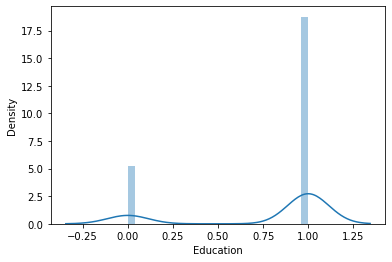

In [45]:
sns.distplot(df['Education'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

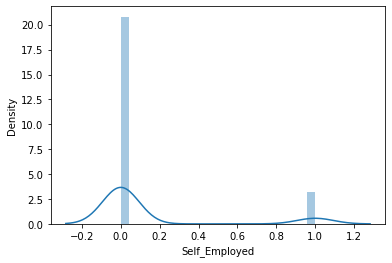

In [46]:
sns.distplot(df['Self_Employed'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

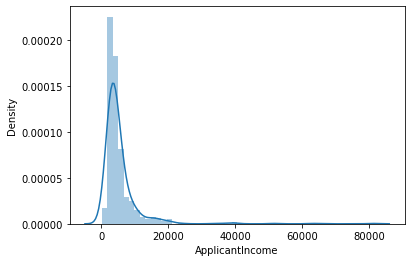

In [47]:
sns.distplot(df['ApplicantIncome'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

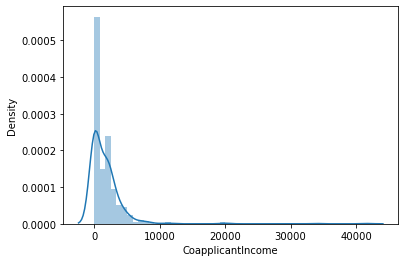

In [48]:
sns.distplot(df['CoapplicantIncome'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

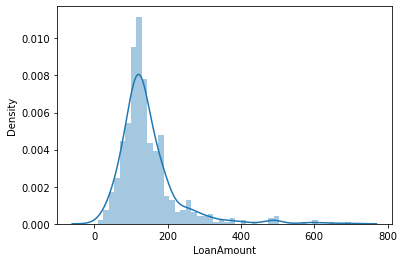

In [49]:
sns.distplot(df['LoanAmount'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

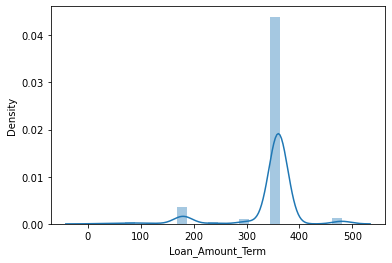

In [50]:
sns.distplot(df['Loan_Amount_Term'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

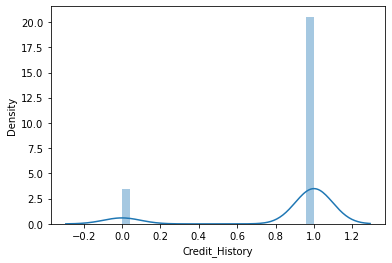

In [51]:
sns.distplot(df['Credit_History'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

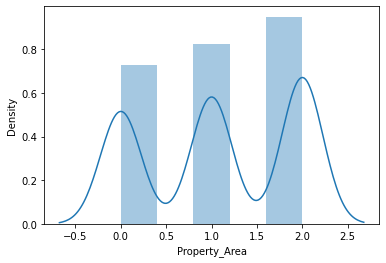

In [52]:
sns.distplot(df['Property_Area'])

#### <span style="color:blue">Observation:-</span>
The data of this column is not normalized. The building blocks is out of the normalized curve.

#### <span style="color:purple">What we will do?</span>

The Normal Distribution Curve of outcome (Loan_Status) is irrelevant. So, we will apply transformation technique to make make skewness b/w -0.65 to +0.65

#### <span style="color:purple">Because</span>
The Normal Distribution shows that the data is skewed

#  <span style="color:red">Data Cleaning</span>

In [53]:
df.corr()['Loan_Status']

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education            0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Credit_History       0.540556
Property_Area        0.137545
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

#### <span style="color:blue">Observation:-</span>
- Based on above steps, we can conclude that 'Gender','Dependents','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term' columns shows lot of skewness.

- So, we gonna delete them.

In [54]:
delete=pd.DataFrame([['0.017987','Gender','No','Alot'],['0.010118','Dependents','No','Alot'],['-0.003700','Self_Employed','No','Alot'],['-0.004710','ApplicantIncome','No','Alot'],['-0.033214','LoanAmount','No','Alot'],['-0.022549','Loan_Amount_Term','No','Alot']],columns=['Correlation with Target','Column Name','Normalised','Outliers'])

In [55]:
df=df.drop([ 'Gender','Dependents','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'],axis=1)
df

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0.0,1,0.0,1.0,1,1
1,1.0,1,1508.0,1.0,0,0
2,1.0,1,0.0,1.0,1,1
3,1.0,0,2358.0,1.0,1,1
4,0.0,1,0.0,1.0,1,1
...,...,...,...,...,...,...
609,0.0,1,0.0,1.0,0,1
610,1.0,1,0.0,1.0,0,1
611,1.0,1,240.0,1.0,1,1
612,1.0,1,0.0,1.0,1,1


#  <span style="color:red">Visualisation of Data </span>

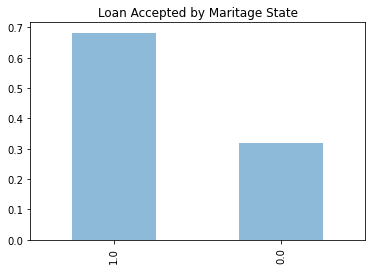

In [56]:
df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Maritage State')
plt.show()

#### <span style="color:blue">Observation:-</span>
Based on above diagram, we can conclude that:-

- Married column is having a strong relation with the Loan Status.
- Married people having a great chance that there loan will be accepted.

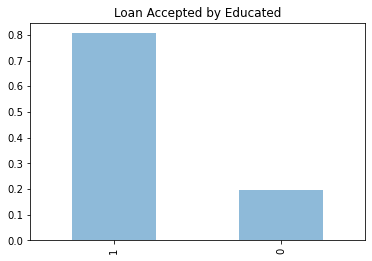

In [57]:
df.Education[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Educated')
plt.show()

#### <span style="color:blue">Observation:-</span>
Based on above diagram, we can conclude that:-

- Level Education play a very important role in the process of procuring Loan.
- Graduate people having a great chance that there loan will be accepted.

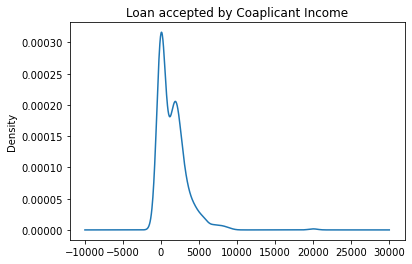

In [58]:
df.CoapplicantIncome[df.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

#### <span style="color:blue">We are using Kernel Density:-</span>
Because CoapplicantIncome is not a categorical in nature.

#### <span style="color:blue">Observation:-</span>
Based on above diagram, we can conclude that:-

- In a minus quantity of coapplicant income there are more Loan Status positives.

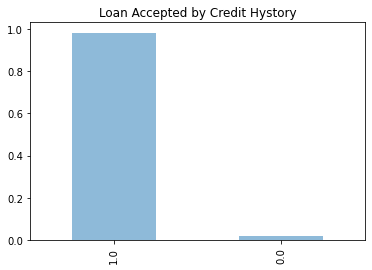

In [59]:
df.Credit_History[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit Hystory')
plt.show()

#### <span style="color:blue">Observation:-</span>
Based on above diagram, we can conclude that:-

- There is a strong relation between the credit history and the loan status.
- If the applicant does not have a credit history then is less chance that the loan of the applicant will be accepted.

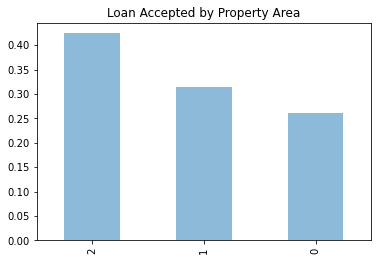

In [60]:
df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
plt.show()

#### <span style="color:blue">Observation:-</span>

- Here :- 0 - Rural, 1 - Urban & 2 - Semiurban

Based on above diagram, we can conclude that:-

- The status of loan depends upon the Property Area.
- Semiurban area is having high chances of loan approval followed by Urban area.


## <span style="color:blue">Classifier Model </span>

Inside the classification, there are many algorithms/models:-

1. Naive Byes Classifier
- Naive Byes Classifier- It works with certain frequency dataset.
- It is of two types:-
- >Multinomial Naive Bayes - will be used when have more than two outputs
- >Gaussian Naive Byes - will be used when we have only two outputs

2. Knearest Neighbour Classifier
3. Decision Tree Clasifier
4. Support Vector Machine Classifier
5. Neural Network


In [61]:
# independent column

x = df.iloc[:,:-1]

In [62]:
x

,Married,Education,CoapplicantIncome,Credit_History,Property_Area
0,0.0,1,0.0,1.0,1
1,1.0,1,1508.0,1.0,0
2,1.0,1,0.0,1.0,1
3,1.0,0,2358.0,1.0,1
4,0.0,1,0.0,1.0,1
...,...,...,...,...,...
609,0.0,1,0.0,1.0,0
610,1.0,1,0.0,1.0,0
611,1.0,1,240.0,1.0,1
612,1.0,1,0.0,1.0,1


In [63]:
# target

y= df.iloc[:,-1]

In [64]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

### <span style="color:red">Scaling Data </span>

In [65]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

### <span style="color:red">Spliting the data for training & testing </span>

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

## <span style="color:blue">Using KNearest Neighbors Classifier:-</span>

In [67]:
# To import the library

from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn.score(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7967479674796748
[[14 19]
 [ 6 84]]
              precision    recall  f1-score   support

           0       0.70      0.42      0.53        33
           1       0.82      0.93      0.87        90

    accuracy                           0.80       123
   macro avg       0.76      0.68      0.70       123
weighted avg       0.78      0.80      0.78       123



## <span style="color:blue">Using DecisionTreeClassifier:-</span>

In [69]:
# To call Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [70]:
# Applying Decision Tree Classifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))                                                                                                                                                                                                                                                           

0.7479674796747967
[[18 15]
 [16 74]]
              precision    recall  f1-score   support

           0       0.53      0.55      0.54        33
           1       0.83      0.82      0.83        90

    accuracy                           0.75       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.75      0.75      0.75       123



## <span style="color:blue">Using Logistic Regression:-</span>

In [71]:
# To call LogisticRegression

from sklearn.linear_model import LogisticRegression

In [72]:
lr=LogisticRegression()

In [73]:
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
predlr=lr.predict(X_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## <span style="color:blue">Support Vector Machine Classifier:-</span>

In [74]:
# To call Support Vector Machine Classifier (SVM)

from sklearn.svm import SVC

In [75]:
# Applying Support Vector Machine (SVM) Classifier 

svc=SVC()
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [76]:
# Applying Support Vector Machine (SVM) Classifier 

svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [77]:
# Applying Support Vector Machine (SVM) Classifier 

svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
predsvc=svc.predict(X_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8373983739837398
[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [78]:
# Applying Support Vector Machine (SVM) Classifier by function & calling 2 times

def svmkernel (ker):
    svc=SVC(kernel=ker)
    svc.fit(X_train,y_train)
    svc.score(X_train,y_train)
    predsvc=svc.predict(X_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [79]:
# To get result with rbf function

svmkernel ('rbf')

0.8292682926829268
[[14 19]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [80]:
# To get result with poly function

svmkernel ('poly')

0.8373983739837398
[[15 18]
 [ 2 88]]
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



### <span style="color:red">We will consider SVM with kernel='rbf'Classifier </span>



- Because this model is having best accuracy between other models.

<span style="color:blue">Observation:-</span>


Based on the performance of above models, we can conclude that:-

- Support Vector Machine Classifier Model is performing well because it is having maximum accuracy score which is 80% along with the precision. 

# <span style="color:red">MODEL SAVING:---------</span>

In [81]:
import pickle
filename = 'loan_status.pkl'
pickle.dump(svc,open(filename,'wb'))

# <span style="color:red">CONCLUSION:-------- </span>

In [82]:
loan_model = pickle.load(open('loan_status.pkl','rb'))
result = loan_model.score(X_test, y_test)
print(result)

0.8373983739837398


In [83]:
predicted=np.array(lr.predict(X_test))

In [84]:
conclusion=pd.DataFrame([loan_model.predict(X_test)[:],predicted[:]],index=['Predicted','Original'])

In [85]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
Predicted,1,1,1,1,1,0,1,1,0,1,...,1,0,0,1,1,1,1,1,0,1
Original,1,1,1,1,1,0,1,1,0,1,...,1,0,0,1,1,1,1,1,0,1
